<a href="https://colab.research.google.com/github/dhrish-s/PythonLearning/blob/main/AIML_Task_4_HierarchialCLustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Use the wholesale customer dataset. The dataset consists of whole sale items like milk, grocery, detergents, and so on. Utilize the all these features to cluster groups.

**Import needy packages**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler,normalize
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

**Read wholesale customers data, and then fill NaN values (if available) with forward fill methods**

In [ ]:
df=pd.read_csv('Wholesale customers data.csv')

In [ ]:
#taking 10 records.forward fill
df.fillna(method='ffill',inplace=True)
df=df[:10]
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


**Scale and normalize the dataset**

In [ ]:
#scaling so that features become comparable
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_scaled=ss.fit_transform(df)

In [ ]:
#normalize-normalize the data so that the data approximatly follows gaussian distribution
x_normalized=normalize(X_scaled)
print(type(x_normalized))

#converting numpy array into a pandas dataframe
x_normalized=pd.DataFrame(x_normalized,columns=df.columns)
print(type(x_normalized))
x_normalized.head()

<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.308998,0.0,0.297687,0.593404,-0.115284,-0.570246,-0.085215,-0.343573
1,0.354281,0.0,-0.468807,0.714690,0.235147,-0.057019,0.151795,-0.249672
2,0.180386,0.0,-0.290442,0.250180,-0.055838,0.097186,0.123053,0.890398
3,-0.494831,0.0,0.149221,-0.420855,-0.259605,0.604986,-0.339105,-0.085800
4,0.159007,0.0,0.797575,-0.119392,-0.089142,0.346943,-0.206120,0.391836


**Draw a dendrogram and decide optimal number of clusters**

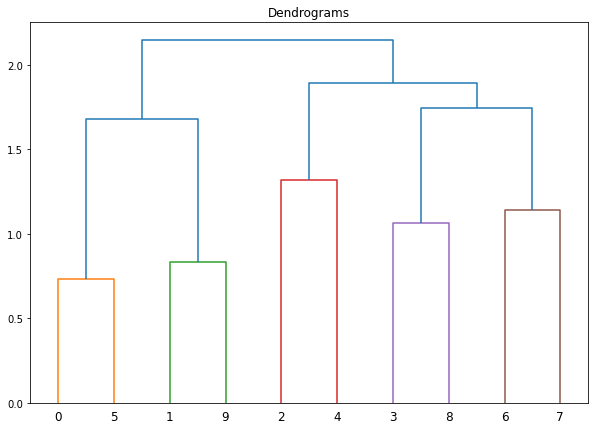

In [ ]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title("Dendrograms")
dend=shc.dendrogram(shc.linkage(x_normalized,method='ward'))

**Agglomerative Clustering**

In [ ]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
y=cluster.fit_predict(x_normalized)
y

array([1, 1, 0, 0, 0, 1, 0, 0, 0, 1], dtype=int64)

**Visualize the clusters with 'Milk' and 'Grocery' feature items**

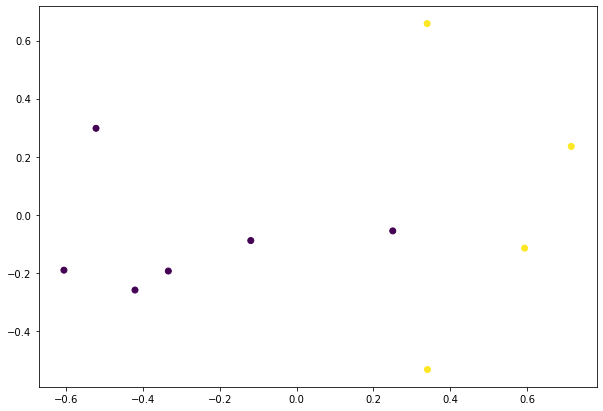

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(x_normalized['Milk'],x_normalized['Grocery'],c=cluster.labels_)